<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving merged_happiness_sdg_2019_2022.csv to merged_happiness_sdg_2019_2022.csv


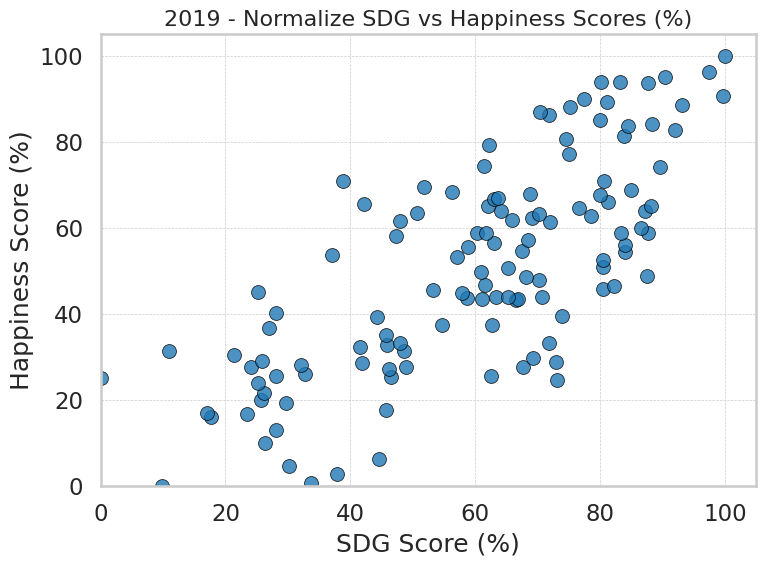

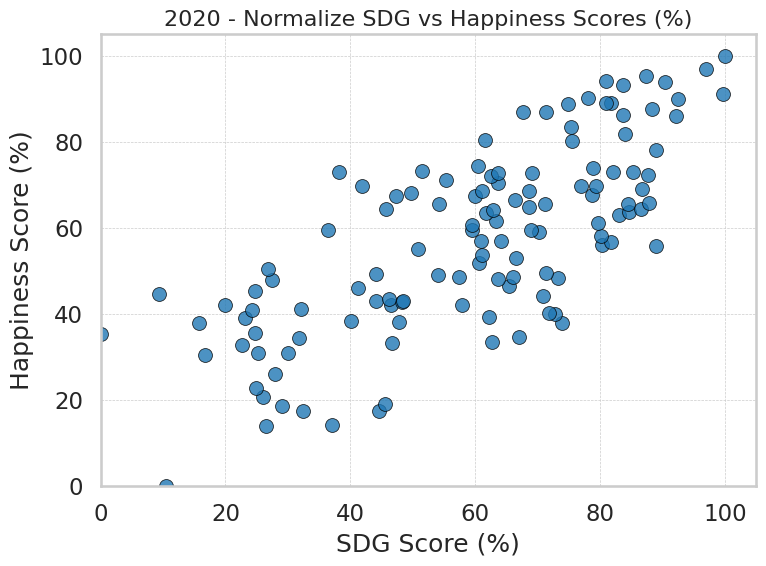

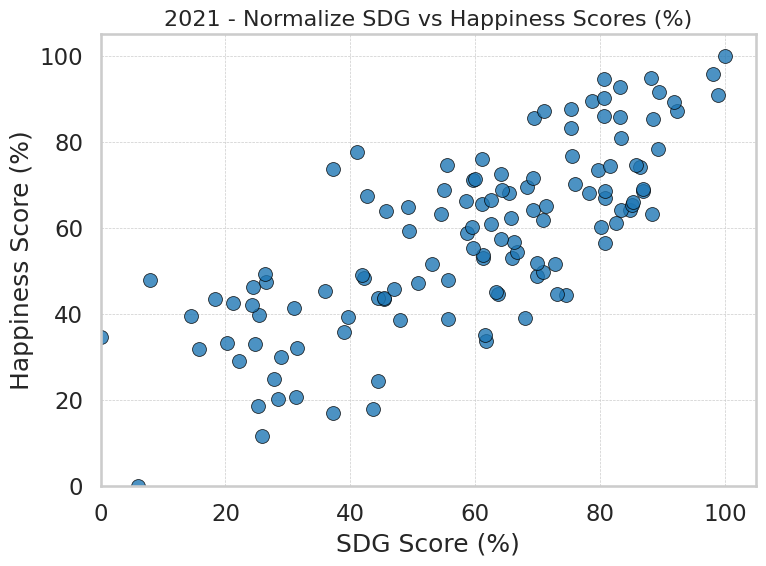

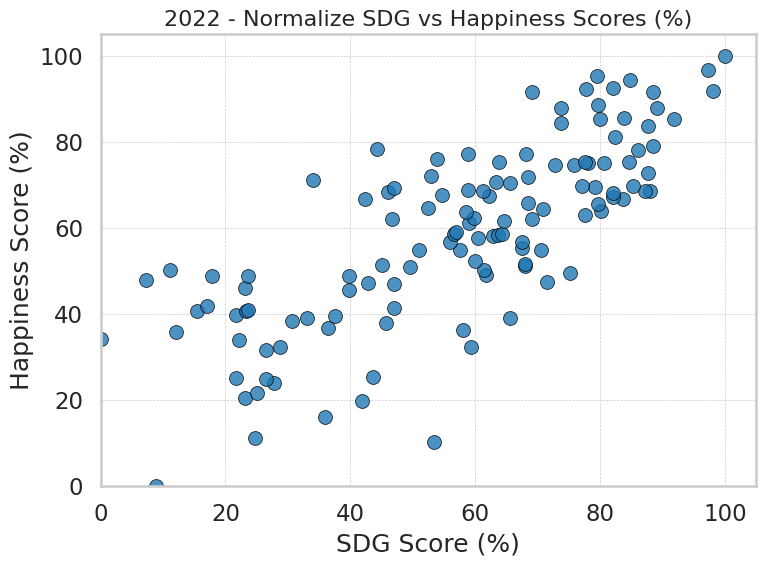

In [ ]:
# 1. Gerekli kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Dosya yükleme (Colab için)
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['merged_happiness_sdg_2019_2022.csv']))

# 3. Normalize etme (Yıl bazında)
df_normalized = df.copy()
df_normalized['SDG Score %'] = df.groupby('Year')['SDG Score'].transform(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))
df_normalized['Happiness score %'] = df.groupby('Year')['Happiness score'].transform(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))

# 4. Scatter Plot - Estetik versiyon (yıl bazlı)
sns.set(style="whitegrid", context="talk")
years = sorted(df['Year'].unique())
marker_style = dict(s=100, alpha=0.8, edgecolor='black', linewidth=0.6)

for year in years:
    plt.figure(figsize=(8, 6))
    data = df_normalized[df_normalized['Year'] == year]
    sns.scatterplot(
        data=data,
        x='SDG Score %',
        y='Happiness score %',
        color='#1f77b4',  # klasik mavi tonu
        marker='o',
        **marker_style
    )
    plt.title(f"{year} - Normalize SDG vs Happiness Scores (%)", fontsize=16)
    plt.xlabel("SDG Score (%)")
    plt.ylabel("Happiness Score (%)")
    plt.xlim(0, 105)
    plt.ylim(0, 105)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
